# Generate a spectrogram from a file
Do imports first

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm
# to enable zooming in matplotlib in notebook
#%matplotlib notebook 
#conda install -c conda-forge ipympl # or pip install ipympl #This is to allow zooming in the notebook
# %matplotlib ipympl

Name audio and annotation file that you want to import (without the extensions), then read in the audio and annotations

In [74]:
#File index
file = 'Rupes A and B/5713.210809120002'  #from PPT at time 892-896 (Rupe B)
# file = 'Guttural rupe/5711.211013040024'
# file = 'Moan/5713.210902110002'  #from PPT at time 212 seconds

#Read the 3 files
sample_rate, samples = wavfile.read(file+'.wav')
annot_file_path = file +'.Table.1.selections.txt'

#Read the file into a DataFrame
df = pd.read_csv(annot_file_path, sep='\t')

#Display the first few rows of the DataFrame
df.head(3)


,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),Annotation
0,1,Spectrogram 1,1,871.984579,872.045877,75.224,426.862,0.0613,351.638,-97.26,Rupe A
1,2,Spectrogram 1,1,872.605082,872.730809,42.314,470.151,0.1257,427.837,-84.86,Rupe A
2,3,Spectrogram 1,1,873.525329,873.616653,65.821,493.658,0.0913,427.837,-90.74,Rupe A


## Perform EDA


In [75]:
#Display the columns of the DataFrame
df.columns

Index(['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)',
       'Low Freq (Hz)', 'High Freq (Hz)', 'Delta Time (s)', 'Delta Freq (Hz)',
       'Avg Power Density (dB FS/Hz)', 'Annotation'],
      dtype='object')

In [76]:
# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Selection                     29 non-null     int64  
 1   View                          29 non-null     object 
 2   Channel                       29 non-null     int64  
 3   Begin Time (s)                29 non-null     float64
 4   End Time (s)                  29 non-null     float64
 5   Low Freq (Hz)                 29 non-null     float64
 6   High Freq (Hz)                29 non-null     float64
 7   Delta Time (s)                29 non-null     float64
 8   Delta Freq (Hz)               29 non-null     float64
 9   Avg Power Density (dB FS/Hz)  29 non-null     float64
 10  Annotation                    29 non-null     object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.6+ KB
None


In [77]:
# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Selection,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz)
count,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,1.0,953.512370,953.783284,58.660828,451.367069,0.270910,392.706241,-88.994483
std,8.514693,0.0,87.193672,87.160760,7.474535,95.183181,0.153009,94.687874,3.110412
min,1.000000,1.0,871.984579,872.045877,42.314000,178.657000,0.061300,122.239000,-97.260000
25%,8.000000,1.0,884.961746,885.231530,56.418000,422.764000,0.143900,366.718000,-90.450000
50%,15.000000,1.0,962.736346,963.151872,61.120000,460.748000,0.269400,409.031000,-88.540000
75%,22.000000,1.0,979.767351,980.109817,61.120000,503.061000,0.374400,442.726000,-86.600000
max,29.000000,1.0,1150.321528,1150.412852,75.224000,682.927000,0.579900,617.886000,-84.860000


In [78]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Selection                       0
View                            0
Channel                         0
Begin Time (s)                  0
End Time (s)                    0
Low Freq (Hz)                   0
High Freq (Hz)                  0
Delta Time (s)                  0
Delta Freq (Hz)                 0
Avg Power Density (dB FS/Hz)    0
Annotation                      0
dtype: int64

In [79]:
# Display unique values in the 'Annotation' column
print("\nUnique Annotations:")
print(df['Annotation'].unique())


Unique Annotations:
['Rupe A' 'Rupe B' 'Rupe C' 'Growl B']


In [80]:
# Count the occurrences of each annotation
print("\nAnnotation Counts:")
print(df['Annotation'].value_counts())


Annotation Counts:
Annotation
Rupe A     14
Rupe B     12
Growl B     2
Rupe C      1
Name: count, dtype: int64


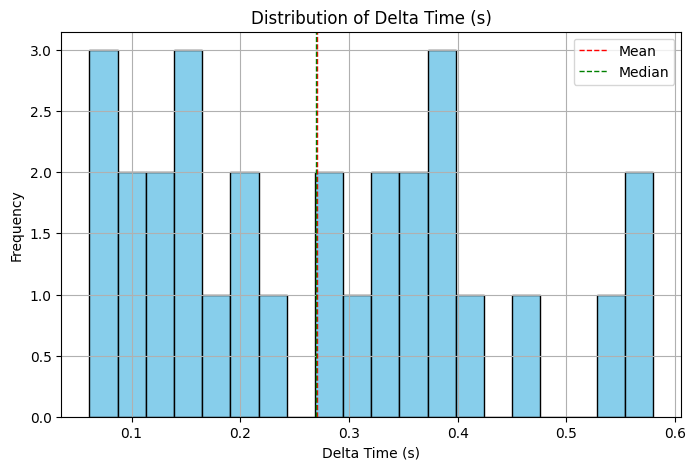

In [81]:
# Plot the distribution of 'Delta Time (s)'
plt.figure(figsize=(8, 5))
df['Delta Time (s)'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Delta Time (s)')
plt.xlabel('Delta Time (s)')
plt.ylabel('Frequency')
plt.axvline(df['Delta Time (s)'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Delta Time (s)'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
df.to_csv('annotations.csv', index=False)

# Calculate the Spectrogram

In [83]:
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate, nperseg=2456, nfft=4096, noverlap=1228, window='hann')       #Try nfft=8192 if computer permits

With the resultsing spectrogram, trim all the tiny values so that log scale displays correctly. Also, all of the relevant info is below 1KHz so trim the data to only display sub 1-KHz frequencies 

In [84]:
spectrogram[spectrogram < 0.001] = 0.001    #Trim off all the tiny values so that log scale displays correctly

#Trim in frequency
fmin = 20 # Hz
fmax = 1000 # Hz
freq_slice = np.where((frequencies >= fmin) & (frequencies <= fmax))

#keep only frequencies of interest
frequencies = frequencies[freq_slice]
spectrogram = spectrogram[freq_slice,:][0]

Next I'm going to define a dunction that will overlay the annotated rectangles onto the spectrogram (different colours for each call)

In [85]:
def overlay_annotations(ax, df, annotation_colors):
    #Track labels to ensure they are added only once in the legend
    added_labels = set()

    for _, row in df.iterrows():
        start_time = row['Begin Time (s)']
        end_time = row['End Time (s)']
        low_freq = row['Low Freq (Hz)']
        high_freq = row['High Freq (Hz)']
        annotation = row['Annotation']

        #Skip if the annotation is not in the defined colors
        if annotation not in annotation_colors:
            continue

        #Draw rectangles
        ax.add_patch(
            plt.Rectangle(
                (start_time, low_freq),  #Bottom Left corner
                end_time - start_time,  #Width (time)
                high_freq - low_freq,  #Height (frequency)
                edgecolor=annotation_colors[annotation],
                facecolor='none',
                linewidth=2,
                label=annotation if annotation not in added_labels else None  #Add label once
            )
        )
        added_labels.add(annotation)  #Mark label as added

    ax.legend(loc='upper right')     #Add legend

I've also written a function below that updates the colormap when you zoom in on a particular region - so that the max and min values are always visible

In [86]:
def update_colormap(event):
    #Get current view limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #Find indices corresponding to the current view limits
    x_indices = np.where((times >= xlim[0]) & (times <= xlim[1]))[0]
    y_indices = np.where((frequencies >= ylim[0]) & (frequencies <= ylim[1]))[0]

    #Handle cases where no data is visible
    if len(x_indices) == 0 or len(y_indices) == 0:
        return

    #Extract the visible data
    data_visible = spectrogram[np.ix_(y_indices, x_indices)]
    #data_visible = np.log(spectrogram)[np.ix_(y_indices, x_indices)]

    #Compute new color limits
    vmin = np.nanmin(data_visible)
    vmax = np.nanmax(data_visible)

    #Update the color limits of the pcolormesh
    pc.set_clim(vmin=vmin, vmax=vmax)
    
    #Update the colorbar to reflect the new color limits
    cbar.update_normal(pc)

    #Redraw the figure
    plt.draw()
    

Ok, let's plot the spectrogram and annotations

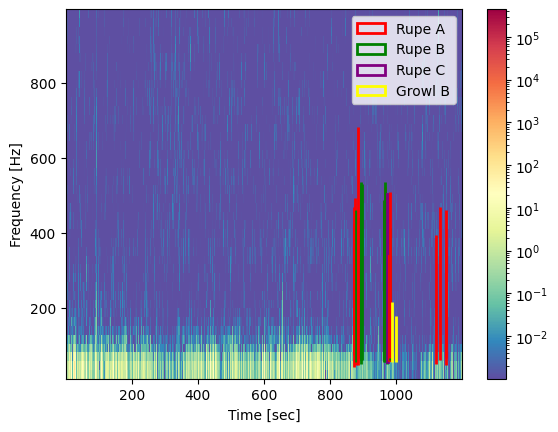

In [87]:
#Define colors for annotations
annotation_colors = {
    "Rupe A": "red",
    "Rupe B": "green",
    "Growl B": "yellow",
    "Rupe C" : "purple",
    "Moan": "pink",
    "G rupe" : "blue"
}

pc = plt.pcolormesh(times, frequencies, spectrogram, norm=LogNorm(), cmap='Spectral_r')
#pc = plt.pcolormesh(times, frequencies, np.log(spectrogram))
cbar = plt.colorbar(pc)
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#Get the current axes
ax = plt.gca()
overlay_annotations(ax, df, annotation_colors)

#Connect the update function to the axes limit change events
ax.callbacks.connect('xlim_changed', update_colormap)
ax.callbacks.connect('ylim_changed', update_colormap)

plt.show()

Extract out a portion of interest from the spectrogram

(25, 469)


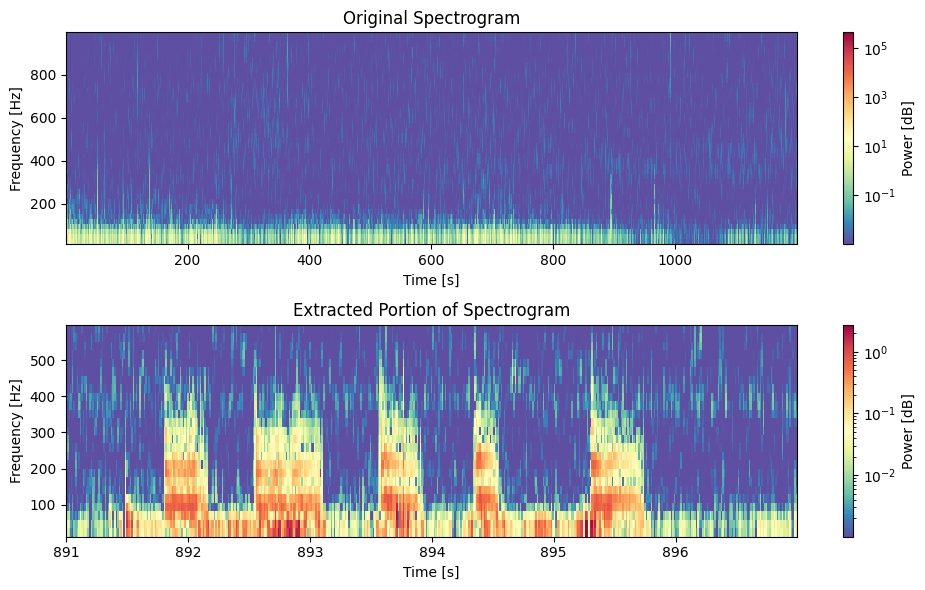

In [88]:
#Define time and frequency limits
time_start, time_end = 891, 897  # Time range in seconds
freq_start, freq_end = 20, 600  # Frequency range in Hz

#Find indices for the time range
time_indices = np.where((times >= time_start) & (times <= time_end))[0]

#Find indices for the frequency range
freq_indices = np.where((frequencies >= freq_start) & (frequencies <= freq_end))[0]

#Extract the portion of the spectrogram
spectrogram_sub = spectrogram[freq_indices][:, time_indices]
frequencies_sub = frequencies[freq_indices]
times_sub = times[time_indices]
print(spectrogram_sub.shape)

#Plot the original and sub-portion spectrograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.pcolormesh(times, frequencies, spectrogram, norm=LogNorm(), cmap='Spectral_r')
plt.title('Original Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.subplot(2, 1, 2)
plt.pcolormesh(times_sub, frequencies_sub, spectrogram_sub, norm=LogNorm(), cmap='Spectral_r')
plt.title('Extracted Portion of Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.tight_layout()
plt.show()


I'm going to extract a single call now and check the size of the spectrogram array

Spectrogram size:  (25, 55)


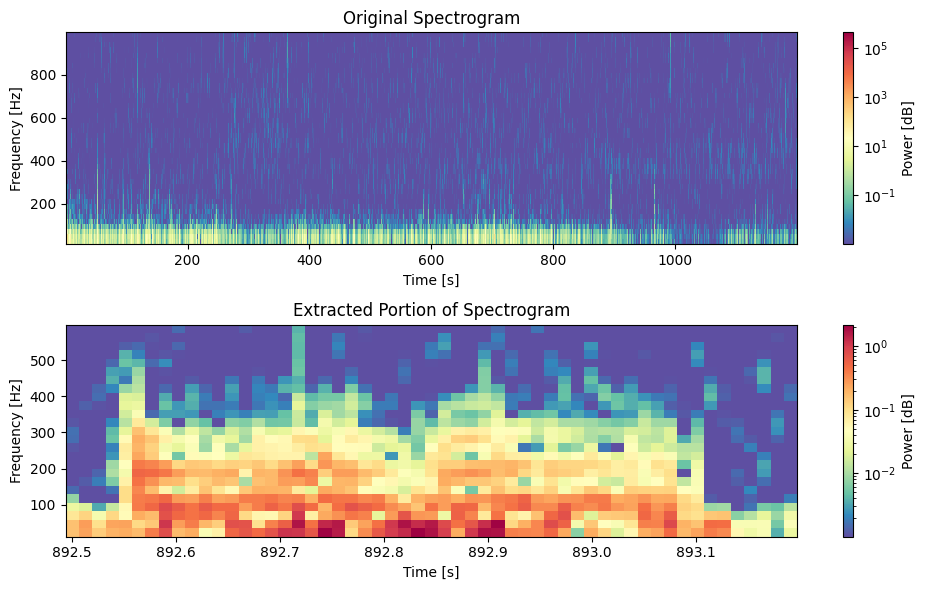

In [89]:
#Define time and frequency limits
time_start, time_end = 892.5, 893.2  # Time range in seconds
freq_start, freq_end = 20, 600  # Frequency range in Hz

#Find indices for the time range
time_indices = np.where((times >= time_start) & (times <= time_end))[0]

#Find indices for the frequency range
freq_indices = np.where((frequencies >= freq_start) & (frequencies <= freq_end))[0]

#Extract the portion of the spectrogram
spectrogram_sub = spectrogram[freq_indices][:, time_indices]
frequencies_sub = frequencies[freq_indices]
times_sub = times[time_indices]
print("Spectrogram size: ", spectrogram_sub.shape)

#Plot the original and sub-portion spectrograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.pcolormesh(times, frequencies, spectrogram, norm=LogNorm(), cmap='Spectral_r')
plt.title('Original Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.subplot(2, 1, 2)
plt.pcolormesh(times_sub, frequencies_sub, spectrogram_sub, norm=LogNorm(), cmap='Spectral_r')
plt.title('Extracted Portion of Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.tight_layout()
plt.show()

Try and save the spectrogram plot. (I wouldn't actually do this in practice - I would save the extracted spectrogram as raw data to be used for ML)

In [90]:
plt.savefig('spectrogram.png')
#plt.clf()
print(spectrogram_sub)

[[0.16207448 0.24776597 0.13622572 ... 0.0376116  0.00364482 0.02580515]
 [0.16026706 0.2627352  0.0980401  ... 0.03795517 0.00569286 0.04049847]
 [0.08340926 0.12152963 0.03355524 ... 0.02268031 0.00826415 0.03017189]
 ...
 [0.001      0.001      0.001      ... 0.001      0.001      0.001     ]
 [0.001      0.001      0.001      ... 0.001      0.00109778 0.001     ]
 [0.001      0.001      0.001      ... 0.001      0.001      0.001     ]]


<Figure size 640x480 with 0 Axes>

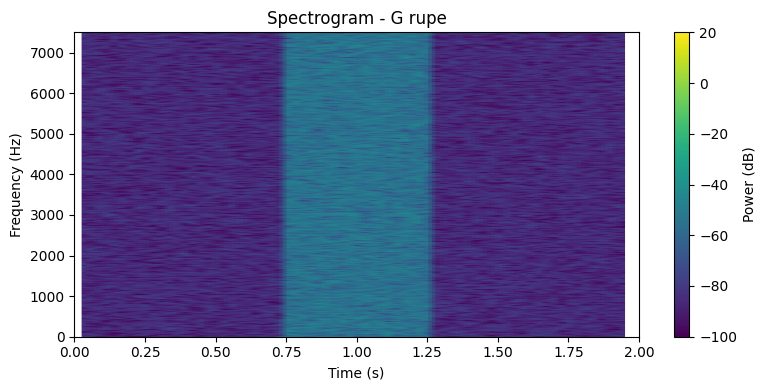

In [92]:
# Create a simulated G rupe call
def create_g_rupe_spectrogram():
    # Set duration and frequency parameters
    duration = 2.0  # seconds
    fs = 44100  # sampling frequency (Hz)
    
    # Time array
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    
    # Create empty signal
    audio = np.zeros_like(t)
    
    # Parameters for G rupe call
    call_start = 0.75  # seconds
    call_end = 1.25  # seconds
    call_idx_start = int(call_start * fs)
    call_idx_end = int(call_end * fs)
    
    # Base frequency of the call
    base_freq = 100
    
    # Create the G rupe call - strong energy at low frequencies
    call_duration = call_end - call_start
    call_t = np.linspace(0, call_duration, call_idx_end - call_idx_start, endpoint=False)
    
    # Multiple frequency components for realism
    for freq in [base_freq, base_freq*1.5, base_freq*2, base_freq*2.5, base_freq*3]:
        # Add harmonics with decreasing amplitude
        audio[call_idx_start:call_idx_end] += (1/freq) * np.sin(2 * np.pi * freq * call_t)
    
    # Add some broadband noise in the call section for realism
    noise_level = 0.4
    audio[call_idx_start:call_idx_end] += noise_level * np.random.normal(0, 1, len(call_t))
    
    # Add very low background noise to the entire signal
    background_noise = 0.01 * np.random.normal(0, 1, len(t))
    audio += background_noise
    
    # Generate spectrogram
    nperseg = 2456  # Match parameters from your original code
    nfft = 8192  # Higher for better frequency resolution
    noverlap = 1228
    
    frequencies, times, Sxx = signal.spectrogram(
        audio, fs, nperseg=nperseg, nfft=nfft, noverlap=noverlap, window='hann'
    )
    
    # Convert to dB scale for better visualization
    Sxx_db = 10 * np.log10(Sxx + 1e-10)  # Add small value to avoid log(0)
    
    return frequencies, times, Sxx_db

# Create the spectrogram data
frequencies, times, spectrogram = create_g_rupe_spectrogram()

# Plotting with similar style to the example
plt.figure(figsize=(8, 4))

# Plot the spectrogram with specific color range
plt.pcolormesh(times, frequencies, spectrogram, cmap='viridis', 
               vmin=-100, vmax=20, shading='gouraud')

# Set axis limits to match the example
plt.ylim(0, 7500)
plt.xlim(0, 2.0)

# Add colorbar and labels
cbar = plt.colorbar(label='Power (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram - G rupe')

# Improve overall appearance
plt.tight_layout()
plt.grid(False)

plt.savefig('g_rupe_spectrogram.png', dpi=300, bbox_inches='tight')
plt.show()

## Data Pre-processing

In [59]:
import os
import glob
from tqdm import tqdm
import pickle
import random
from sklearn.model_selection import train_test_split

In [60]:
# Define helper functions for processing

def extract_spectrogram(audio_file, annotation_row, padding_seconds=0.2):
    """
    Extract a spectrogram for a specific call from an audio file based on annotation.
    
    Args:
        audio_file: Path to the WAV file
        annotation_row: Pandas Series containing annotation data for a specific call
        padding_seconds: Extra time to add before and after the call for context
    
    Returns:
        frequencies, times, spectrogram data
    """
    # Read the audio file
    sample_rate, samples = wavfile.read(audio_file)
    
    # Extract the time boundaries with padding
    start_time = max(0, annotation_row['Begin Time (s)'] - padding_seconds)
    end_time = min(len(samples)/sample_rate, annotation_row['End Time (s)'] + padding_seconds)
    
    # Convert times to sample indices
    start_sample = int(start_time * sample_rate)
    end_sample = int(end_time * sample_rate)
    
    # Extract the segment
    segment = samples[start_sample:end_sample]
    
    # Calculate spectrogram
    frequencies, times, spectrogram = signal.spectrogram(
        segment, sample_rate, nperseg=2456, nfft=4096, noverlap=1228, window='hann'
    )
    
    # Adjust times to be relative to the original audio
    times = times + start_time
    
    # Apply minimum threshold for log scaling
    spectrogram[spectrogram < 0.001] = 0.001
    
    # Filter frequencies of interest (20 Hz to 1000 Hz)
    fmin, fmax = 20, 1000
    freq_slice = np.where((frequencies >= fmin) & (frequencies <= fmax))
    frequencies = frequencies[freq_slice]
    spectrogram = spectrogram[freq_slice,:][0]
    
    return frequencies, times, spectrogram


def extract_standardized_spectrogram(audio_file, annotation_row, target_shape=(128, 128), padding_seconds=0.2):
    """
    Extract a standardized spectrogram that can be used for ML model input.
    
    Args:
        audio_file: Path to the WAV file
        annotation_row: Pandas Series with annotation data
        target_shape: Target size for the spectrogram (height, width)
        padding_seconds: Extra time padding
        
    Returns:
        Resized spectrogram as a numpy array
    """
    # Get the raw spectrogram
    frequencies, times, spectrogram = extract_spectrogram(audio_file, annotation_row, padding_seconds)
    
    # Log scale for better visualization of low-power signals
    log_spectrogram = np.log10(spectrogram)
    
    # Resize to target shape using simple interpolation
    from scipy.ndimage import zoom
    
    # Calculate zoom factors for each dimension
    zoom_factors = (target_shape[0]/log_spectrogram.shape[0], 
                   target_shape[1]/log_spectrogram.shape[1])
    
    # Resize the spectrogram
    resized_spectrogram = zoom(log_spectrogram, zoom_factors, order=1)
    
    return resized_spectrogram


def extract_no_call_spectrogram(audio_file, annotations_df, duration_seconds=0.5, 
                               min_distance_from_call=1.0, target_shape=(128, 128)):
    """
    Extract a "no call" spectrogram from regions without annotations.
    
    Args:
        audio_file: Path to the WAV file
        annotations_df: DataFrame with all annotations for this file
        duration_seconds: Length of the no-call segment to extract
        min_distance_from_call: Minimum distance from any annotated call
        target_shape: Target spectrogram shape
        
    Returns:
        Standardized spectrogram or None if no suitable region found
    """
    # Read the audio file
    sample_rate, samples = wavfile.read(audio_file)
    total_duration = len(samples) / sample_rate
    
    # Get all call time ranges for this file
    call_ranges = []
    for _, row in annotations_df.iterrows():
        call_ranges.append((row['Begin Time (s)'] - min_distance_from_call, 
                           row['End Time (s)'] + min_distance_from_call))
    
    # Try to find a non-overlapping region
    max_attempts = 10
    for _ in range(max_attempts):
        # Pick a random start time
        start_time = random.uniform(0, total_duration - duration_seconds)
        end_time = start_time + duration_seconds
        
        # Check if this overlaps with any call
        overlaps = False
        for call_start, call_end in call_ranges:
            if (start_time <= call_end and end_time >= call_start):
                overlaps = True
                break
        
        if not overlaps:
            # Create a fake annotation row for the no-call region
            no_call_annotation = pd.Series({
                'Begin Time (s)': start_time,
                'End Time (s)': end_time,
                'Low Freq (Hz)': 20,  # Same as call frequency range
                'High Freq (Hz)': 1000,
                'Annotation': 'No Call'
            })
            
            # Extract the spectrogram using our existing function
            return extract_standardized_spectrogram(audio_file, no_call_annotation, target_shape)
    
    # If we couldn't find a suitable region after max attempts
    return None

In [8]:
# Find the optimal spectrogram size based on the longest and broadest calls

def find_optimal_spectrogram_shape(annotations_df, padding_factor=1.2):
    """
    Determine the optimal spectrogram shape based on the call durations and frequency ranges.
    
    Args:
        annotations_df: DataFrame with all call annotations
        padding_factor: Factor to multiply the maximum values by for some extra space
        
    Returns:
        Tuple of (time_points, frequency_points) recommended for spectrograms
    """
    # Find the longest call duration
    max_duration = annotations_df['Delta Time (s)'].max() * padding_factor
    
    # Find the widest frequency range
    annotations_df['Freq Range'] = annotations_df['High Freq (Hz)'] - annotations_df['Low Freq (Hz)']
    max_freq_range = annotations_df['Freq Range'].max() * padding_factor
    
    # Calculate number of time and frequency points needed
    # These values depend on our spectrogram parameters (nperseg, nfft, etc.)
    # and will need to be adjusted based on actual spectrogram output
    
    # For a spectrogram with nperseg=2456, noverlap=1228:
    # Time resolution is approximately (nperseg - noverlap) / sample_rate seconds per point
    # Let's estimate based on a common sample rate of 44100 Hz
    sample_rate = 44100
    time_resolution = (2456 - 1228) / sample_rate  # seconds per point
    time_points = int(max_duration / time_resolution)
    
    # For frequency resolution with nfft=4096:
    # Frequency resolution is approximately sample_rate / nfft Hz per point
    freq_resolution = sample_rate / 4096  # Hz per point
    freq_points = int(max_freq_range / freq_resolution)
    
    return (freq_points, time_points)

In [28]:
def build_dataset(base_dir, target_shape=(128, 128), test_size=0.2, val_size=0.1):
    """
    Build a complete dataset of spectrograms for all calls and create train/val/test splits.
    Modified to handle classes with very few examples.
    
    Args:
        base_dir: Base directory where WAV and annotation files are stored
        target_shape: Target shape for all spectrograms
        test_size: Proportion of data to use for testing
        val_size: Proportion of data to use for validation
        
    Returns:
        Dictionary containing the dataset splits and metadata
    """
    # Find all annotation files
    annotation_files = glob.glob(os.path.join(base_dir, '**/*.Table.1.selections.txt'), recursive=True)
    print(f"Found {len(annotation_files)} annotation files")
    
    # Create empty lists to store data
    spectrograms = []
    labels = []
    metadata = []
    
    # Process each annotation file
    for annot_file in tqdm(annotation_files):
        # Determine the corresponding WAV file
        wav_file = annot_file.replace('.Table.1.selections.txt', '.wav')
        if not os.path.exists(wav_file):
            print(f"Warning: WAV file not found for {annot_file}")
            continue
        
        # Read the annotations
        df = pd.read_csv(annot_file, sep='\t')
        
        # Process each call in the file
        for _, row in df.iterrows():
            try:
                # Extract spectrogram for this call
                spec = extract_standardized_spectrogram(wav_file, row, target_shape)
                
                # Store the spectrogram and metadata
                spectrograms.append(spec)
                labels.append(row['Annotation'])
                metadata.append({
                    'file': os.path.basename(wav_file),
                    'begin_time': row['Begin Time (s)'],
                    'end_time': row['End Time (s)'],
                    'annotation': row['Annotation']
                })
                
                # Also extract some "no call" examples from this file
                no_call_spec = extract_no_call_spectrogram(wav_file, df, target_shape=target_shape)
                if no_call_spec is not None:
                    spectrograms.append(no_call_spec)
                    labels.append('No Call')
                    metadata.append({
                        'file': os.path.basename(wav_file),
                        'annotation': 'No Call',
                        'synthetic': True
                    })
            except Exception as e:
                print(f"Error processing call at {row['Begin Time (s)']} in {wav_file}: {e}")
    
    # Convert lists to numpy arrays
    X = np.array(spectrograms)
    y = np.array(labels)
    
    # Create label encoder
    unique_labels = np.unique(y)
    label_to_id = {label: i for i, label in enumerate(unique_labels)}
    id_to_label = {i: label for label, i in label_to_id.items()}
    
    # Convert string labels to integers
    y_encoded = np.array([label_to_id[label] for label in y])
    
    # Count examples per class
    class_counts = np.bincount(y_encoded)
    print("Examples per class:")
    for i, count in enumerate(class_counts):
        print(f"  {id_to_label[i]}: {count} examples")
    
    # Check if any class has too few examples
    min_examples_required = 3  # Minimum examples needed to split into train/val/test
    problem_classes = [id_to_label[i] for i, count in enumerate(class_counts) if count < min_examples_required]
    
    if problem_classes:
        print(f"Warning: The following classes have fewer than {min_examples_required} examples: {problem_classes}")
        print("Using a non-stratified split instead of stratified split.")
        
        # Create train/val/test split without stratification
        X_temp, X_test, y_temp, y_test, meta_temp, meta_test = train_test_split(
            X, y_encoded, metadata, test_size=test_size, random_state=42
        )
        
        # Then split the remaining data into train and validation
        val_adjusted_size = val_size / (1 - test_size)  # Adjust validation size
        X_train, X_val, y_train, y_val, meta_train, meta_val = train_test_split(
            X_temp, y_temp, meta_temp, test_size=val_adjusted_size, random_state=42
        )
    else:
        # Use stratified split when all classes have enough examples
        X_temp, X_test, y_temp, y_test, meta_temp, meta_test = train_test_split(
            X, y_encoded, metadata, test_size=test_size, stratify=y_encoded, random_state=42
        )
        
        # Then split the remaining data into train and validation
        val_adjusted_size = val_size / (1 - test_size)  # Adjust validation size
        X_train, X_val, y_train, y_val, meta_train, meta_val = train_test_split(
            X_temp, y_temp, meta_temp, test_size=val_adjusted_size, stratify=y_temp, random_state=42
        )
    
    # Verify class distribution
    print("\nClass distribution after splitting:")
    print("Training set:")
    train_dist = np.bincount(y_train, minlength=len(unique_labels))
    for i, count in enumerate(train_dist):
        print(f"  {id_to_label[i]}: {count} examples")
    
    print("Validation set:")
    val_dist = np.bincount(y_val, minlength=len(unique_labels))
    for i, count in enumerate(val_dist):
        print(f"  {id_to_label[i]}: {count} examples")
    
    print("Test set:")
    test_dist = np.bincount(y_test, minlength=len(unique_labels))
    for i, count in enumerate(test_dist):
        print(f"  {id_to_label[i]}: {count} examples")
    
    # Create dataset dictionary
    dataset = {
        'X_train': X_train,
        'y_train': y_train,
        'X_val': X_val,
        'y_val': y_val,
        'X_test': X_test,
        'y_test': y_test,
        'meta_train': meta_train,
        'meta_val': meta_val,
        'meta_test': meta_test,
        'label_to_id': label_to_id,
        'id_to_label': id_to_label,
        'target_shape': target_shape
    }
    
    return dataset

Found 19 annotation files
Total annotations: 1583
Unique call types: ['Type 4 A' 'Rupe C' 'Moan' 'G rupe' 'HS Groan' 'Rupe B' 'Rupe A'
 'Growl B' 'rupe A' 'rupe B' 'unidentified' nan 'Type 4 B']
Call duration statistics:
              count      mean       std       min       25%       50%  \
Annotation                                                              
G rupe        722.0  0.557790  0.161904  0.053957  0.502283  0.552511   
Growl B         3.0  0.348966  0.014389  0.336147  0.341185  0.346223   
HS Groan        2.0  0.351844  0.036564  0.325989  0.338916  0.351844   
Moan          426.0  0.493481  0.174337  0.110162  0.379418  0.485612   
Rupe A        252.0  0.130230  0.066667  0.042716  0.077592  0.112410   
Rupe B        119.0  0.300223  0.085136  0.146119  0.244817  0.284134   
Rupe C         25.0  0.410284  0.208176  0.122694  0.223744  0.337866   
Type 4 A       18.0  0.232036  0.079325  0.107914  0.170863  0.240978   
Type 4 B        1.0  0.319635       NaN  0.319635

100%|██████████| 19/19 [08:58<00:00, 28.35s/it]


Examples per class:
  G rupe: 722 examples
  Growl B: 3 examples
  HS Groan: 2 examples
  Moan: 426 examples
  No Call: 1583 examples
  Rupe A: 252 examples
  Rupe B: 119 examples
  Rupe C: 25 examples
  Type 4 A: 18 examples
  Type 4 B: 1 examples
  nan: 2 examples
  rupe A: 7 examples
  rupe B: 5 examples
  unidentified: 1 examples
Using a non-stratified split instead of stratified split.

Class distribution after splitting:
Training set:
  G rupe: 517 examples
  Growl B: 2 examples
  HS Groan: 1 examples
  Moan: 279 examples
  No Call: 1109 examples
  Rupe A: 178 examples
  Rupe B: 86 examples
  Rupe C: 18 examples
  Type 4 A: 12 examples
  Type 4 B: 1 examples
  nan: 2 examples
  rupe A: 5 examples
  rupe B: 5 examples
  unidentified: 0 examples
Validation set:
  G rupe: 70 examples
  Growl B: 0 examples
  HS Groan: 0 examples
  Moan: 44 examples
  No Call: 154 examples
  Rupe A: 33 examples
  Rupe B: 12 examples
  Rupe C: 2 examples
  Type 4 A: 2 examples
  Type 4 B: 0 examples
  

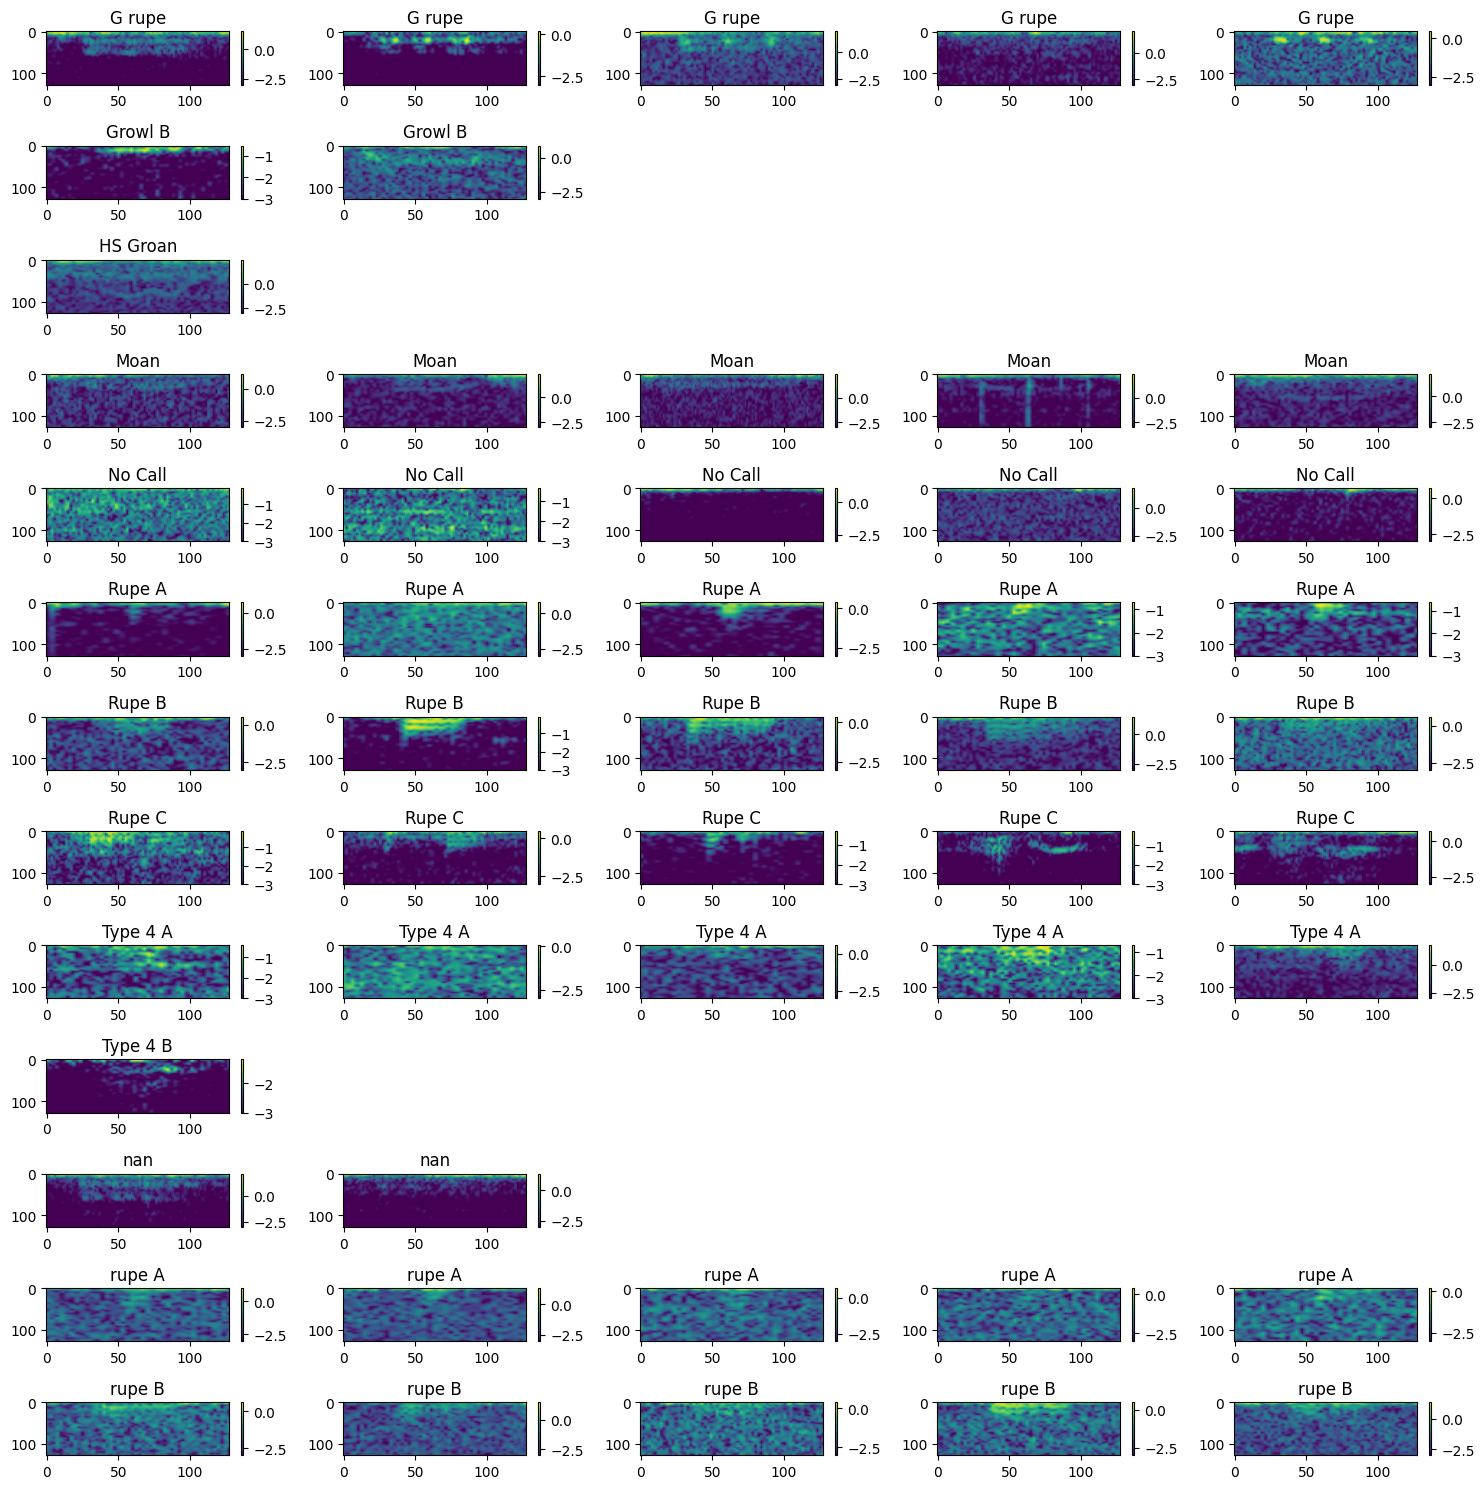

Dataset saved to processed_data/seal_calls_dataset.pkl


In [29]:
# Run the dataset creation process
# Let's first find the optimal spectrogram shape by analyzing all annotations
base_dir = 'data/'  # Path to your combined data directory

# Combine all annotation files
all_annotations = pd.DataFrame()
annotation_files = glob.glob(os.path.join(base_dir, '**/*.Table.1.selections.txt'), recursive=True)

print(f"Found {len(annotation_files)} annotation files")

for file in annotation_files:
    try:
        df = pd.read_csv(file, sep='\t')
        all_annotations = pd.concat([all_annotations, df])
    except Exception as e:
        print(f"Error reading file {file}: {e}")

print(f"Total annotations: {len(all_annotations)}")
if 'Annotation' in all_annotations.columns:
    print(f"Unique call types: {all_annotations['Annotation'].unique()}")
else:
    print(f"Warning: 'Annotation' column not found. Available columns: {all_annotations.columns}")

# Calculate statistics on call durations and frequency ranges
all_annotations['Duration'] = all_annotations['End Time (s)'] - all_annotations['Begin Time (s)']
all_annotations['Freq Range'] = all_annotations['High Freq (Hz)'] - all_annotations['Low Freq (Hz)']

print("Call duration statistics:")
print(all_annotations.groupby('Annotation')['Duration'].describe())

print("\nFrequency range statistics:")
print(all_annotations.groupby('Annotation')['Freq Range'].describe())

# Find optimal shape (but we'll use a standard ML-friendly shape for the actual dataset)
optimal_shape = find_optimal_spectrogram_shape(all_annotations)
print(f"Optimal spectrogram shape: {optimal_shape}")

# Use a standard shape that's friendly for deep learning models
target_shape = (128, 128)  # Height (frequency bins), Width (time steps)
print(f"Using target shape for ML: {target_shape}")

# Generate and save the dataset
print("Building dataset...")
dataset = build_dataset(base_dir, target_shape=target_shape)

# Print dataset statistics
print(f"Dataset created with:")
print(f"- {len(dataset['X_train'])} training samples")
print(f"- {len(dataset['X_val'])} validation samples")
print(f"- {len(dataset['X_test'])} test samples")
print(f"- {len(dataset['label_to_id'])} unique call types")

# Visualize some examples
def plot_examples(dataset, num_examples=5):
    """Plot example spectrograms from the dataset"""
    plt.figure(figsize=(15, num_examples * 3))
    
    # Get unique classes in the training set
    unique_classes = np.unique(dataset['y_train'])
    
    # Get random indices from each class
    for i, class_id in enumerate(unique_classes):
        # Find examples of this class
        indices = np.where(dataset['y_train'] == class_id)[0]
        
        if len(indices) == 0:
            continue
            
        # Take up to num_examples from this class
        for j, idx in enumerate(indices[:min(num_examples, len(indices))]):
            plt.subplot(len(unique_classes), num_examples, i*num_examples + j + 1)
            
            # Handle single channel or RGB data
            spec = dataset['X_train'][idx]
            if len(spec.shape) > 2:
                if spec.shape[2] == 1:  # Single channel
                    spec = spec[:,:,0]
            
            plt.imshow(spec, aspect='auto', cmap='viridis')
            plt.title(f"{dataset['id_to_label'][class_id]}")
            plt.colorbar()
    
    plt.tight_layout()
    plt.show()

# Visualize examples
try:
    plot_examples(dataset)
except Exception as e:
    print(f"Error visualizing examples: {e}")

# Save the dataset
os.makedirs('processed_data', exist_ok=True)
try:
    with open('processed_data/seal_calls_dataset.pkl', 'wb') as f:
        pickle.dump(dataset, f)
    print("Dataset saved to processed_data/seal_calls_dataset.pkl")
except Exception as e:
    print(f"Error saving dataset: {e}")

## Model Training and Evaluation

In [30]:
# Import necessary libraries for model training
# For model creation and training
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50, MobileNetV2, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import time

# Make sure TensorFlow is using GPU if available
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


2025-04-30 04:11:39.724624: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-30 04:11:39.912637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745975500.001962   90365 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745975500.032675   90365 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745975500.241863   90365 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

TensorFlow version: 2.19.0
GPU Available: []


2025-04-30 04:11:56.086140: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Load the processed dataset

In [31]:
# Load the dataset created in the data processing notebook
with open('processed_data/seal_calls_dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

# Extract components
X_train = dataset['X_train']
y_train = dataset['y_train']
X_val = dataset['X_val']
y_val = dataset['y_val']
X_test = dataset['X_test']
y_test = dataset['y_test']
id_to_label = dataset['id_to_label']
label_to_id = dataset['label_to_id']
target_shape = dataset['target_shape']

# Print dataset information
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")
print(f"Number of classes: {len(id_to_label)}")
print(f"Classes: {list(label_to_id.keys())}")



Training set: (2215, 128, 128)
Validation set: (317, 128, 128)
Test set: (634, 128, 128)
Number of classes: 14
Classes: [np.str_('G rupe'), np.str_('Growl B'), np.str_('HS Groan'), np.str_('Moan'), np.str_('No Call'), np.str_('Rupe A'), np.str_('Rupe B'), np.str_('Rupe C'), np.str_('Type 4 A'), np.str_('Type 4 B'), np.str_('nan'), np.str_('rupe A'), np.str_('rupe B'), np.str_('unidentified')]


In [32]:
### Data Preparation for Deep Learning

# Reshape data for CNN input - adding channel dimension if needed
if len(X_train.shape) == 3:
    X_train = X_train[..., np.newaxis]  # Add channel dimension
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

# Check the updated shapes
print(f"Training set shape: {X_train.shape}")
print(f"Input shape for model: {X_train.shape[1:]}")

# Convert labels to one-hot encoding for categorical crossentropy
num_classes = len(id_to_label)
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_onehot = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)




Training set shape: (2215, 128, 128, 1)
Input shape for model: (128, 128, 1)


### Data Augmentation

Spectrograms can benefit from modest augmentation to improve model generalization.

In [33]:

# Define augmentation for spectrograms
# We'll use more conservative augmentation since these are time-frequency representations
def create_augmentation():
    return ImageDataGenerator(
        width_shift_range=0.1,  # Small horizontal shifts (time axis)
        height_shift_range=0.1,  # Small vertical shifts (frequency axis)
        zoom_range=0.1,         # Small zoom
        brightness_range=[0.9, 1.1],  # Slight brightness adjustments
        fill_mode='constant',   # Fill with zeros
        cval=0                  # Fill value
    )

# Create augmentation
train_datagen = create_augmentation()

### Model Architecture

Let's define several model architectures and compare them.


In [34]:

def create_custom_cnn(input_shape, num_classes):
    """Create a custom CNN architecture for spectrogram classification"""
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Third convolutional block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Fourth convolutional block
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

def create_transfer_model(base_model_name, input_shape, num_classes):
    """Create a transfer learning model using pre-trained CNN"""
    # Choose base model
    if base_model_name == 'resnet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == 'mobilenetv2':
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif base_model_name == 'efficientnet':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError(f"Unknown base model: {base_model_name}")
    
    # Freeze the base model
    base_model.trainable = False
    
    # Add custom layers on top
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model


### Model Training Function

In [35]:

def train_model(model, model_name, X_train, y_train, X_val, y_val, batch_size=32, epochs=50):
    """Train a model and save the best version"""
    # Create directory for model checkpoints
    os.makedirs('models', exist_ok=True)
    
    # Compile the model
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Define callbacks
    callbacks = [
        EarlyStopping(patience=10, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6),
        ModelCheckpoint(
            f'models/{model_name}_best.h5', 
            save_best_only=True, 
            monitor='val_accuracy'
        )
    ]
    
    # Train with data augmentation
    augmentation = create_augmentation()
    train_generator = augmentation.flow(X_train, y_train, batch_size=batch_size)
    
    # Start training
    start_time = time.time()
    history = model.fit(
        train_generator,
        steps_per_epoch=len(X_train) // batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )
    training_time = time.time() - start_time
    
    # Print training summary
    print(f"Training completed in {training_time:.2f} seconds")
    print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'models/{model_name}_history.png')
    plt.show()
    
    # Save training history
    with open(f'models/{model_name}_history.pkl', 'wb') as f:
        pickle.dump(history.history, f)
    
    return model, history


### Binary Classification: "Rupe B" vs "No Call"

As suggested in the project description, let's start with the simplest case - a binary classifier between "Rupe B" and "No Call".

Binary classification dataset:
- Training: (1195, 128, 128, 1)
- Validation: (166, 128, 128, 1)
- Test: (341, 128, 128, 1)


/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.8136 - loss: 3.3353

37/37 ━━━━━━━━━━━━━━━━━━━━ 37s 886ms/step - accuracy: 0.8155 - loss: 3.2835 - val_accuracy: 0.4398 - val_loss: 1.7465 - learning_rate: 0.0010
Epoch 2/30
 1/37 ━━━━━━━━━━━━━━━━━━━━ 29s 821ms/step - accuracy: 0.9375 - loss: 0.5768

/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9375 - loss: 0.5768 - val_accuracy: 0.4880 - val_loss: 1.4901 - learning_rate: 0.0010
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 886ms/step - accuracy: 0.9257 - loss: 0.3103 - val_accuracy: 0.0723 - val_loss: 21.6336 - learning_rate: 0.0010
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9375 - loss: 0.3505 - val_accuracy: 0.0723 - val_loss: 23.4580 - learning_rate: 0.0010
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 839ms/step - accuracy: 0.9470 - loss: 0.1444 - val_accuracy: 0.0723 - val_loss: 14.2990 - learning_rate: 0.0010
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 1.0000 - loss: 0.0131 - val_accuracy: 0.0723 - val_loss: 13.8478 - learning_rate: 0.0010
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 819ms/step - accuracy: 0.9759 - loss: 0.0950 - val_accuracy: 0.0843 - val_loss: 10.9037 - learning_rate: 0.0010
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9688 - loss: 0.0376 - val_acc

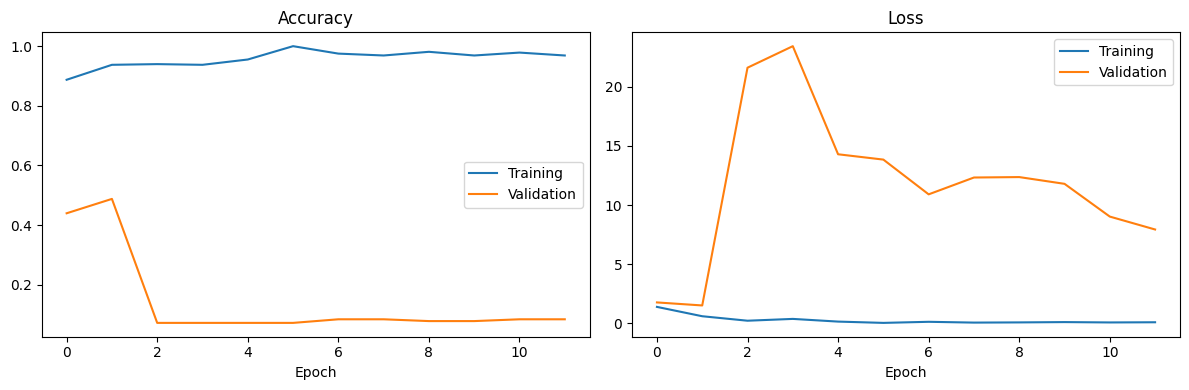

In [36]:
# Filter the dataset for just two classes
# Let's find the indices of "Rupe B" and "No Call" samples
if 'Rupe B' in label_to_id and 'No Call' in label_to_id:
    class1_id = label_to_id['Rupe B']
    class2_id = label_to_id['No Call']
    
    # Filter training data
    train_indices = np.where((y_train == class1_id) | (y_train == class2_id))[0]
    X_train_binary = X_train[train_indices]
    y_train_binary = y_train[train_indices]
    # Remap labels to 0 and 1
    y_train_binary = np.where(y_train_binary == class1_id, 0, 1)
    
    # Filter validation data
    val_indices = np.where((y_val == class1_id) | (y_val == class2_id))[0]
    X_val_binary = X_val[val_indices]
    y_val_binary = y_val[val_indices]
    y_val_binary = np.where(y_val_binary == class1_id, 0, 1)
    
    # Filter test data
    test_indices = np.where((y_test == class1_id) | (y_test == class2_id))[0]
    X_test_binary = X_test[test_indices]
    y_test_binary = y_test[test_indices]
    y_test_binary = np.where(y_test_binary == class1_id, 0, 1)
    
    # Convert to one-hot
    y_train_binary_onehot = tf.keras.utils.to_categorical(y_train_binary, 2)
    y_val_binary_onehot = tf.keras.utils.to_categorical(y_val_binary, 2)
    y_test_binary_onehot = tf.keras.utils.to_categorical(y_test_binary, 2)
    
    print(f"Binary classification dataset:")
    print(f"- Training: {X_train_binary.shape}")
    print(f"- Validation: {X_val_binary.shape}")
    print(f"- Test: {X_test_binary.shape}")
    
    # Build and train a binary classifier
    binary_model = create_custom_cnn(X_train_binary.shape[1:], 2)
    binary_model, binary_history = train_model(
        binary_model, 
        'binary_rupe_b_vs_no_call', 
        X_train_binary, 
        y_train_binary_onehot, 
        X_val_binary, 
        y_val_binary_onehot,
        batch_size=32,
        epochs=30
    )
else:
    print("Required classes ('Rupe B' and/or 'No Call') not found in the dataset")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step
Unique classes in true labels: [0 1]
Unique classes in predictions: [0 1]
Number of classes in predictions and ground truth: 2
Number of class names provided: 2

Classification Report:
              precision    recall  f1-score   support

      Rupe B       0.09      0.95      0.16        21
     No Call       0.99      0.36      0.53       320

    accuracy                           0.40       341
   macro avg       0.54      0.66      0.35       341
weighted avg       0.94      0.40      0.51       341

Model: binary_rupe_b_vs_no_call
Test Accuracy: 0.3988


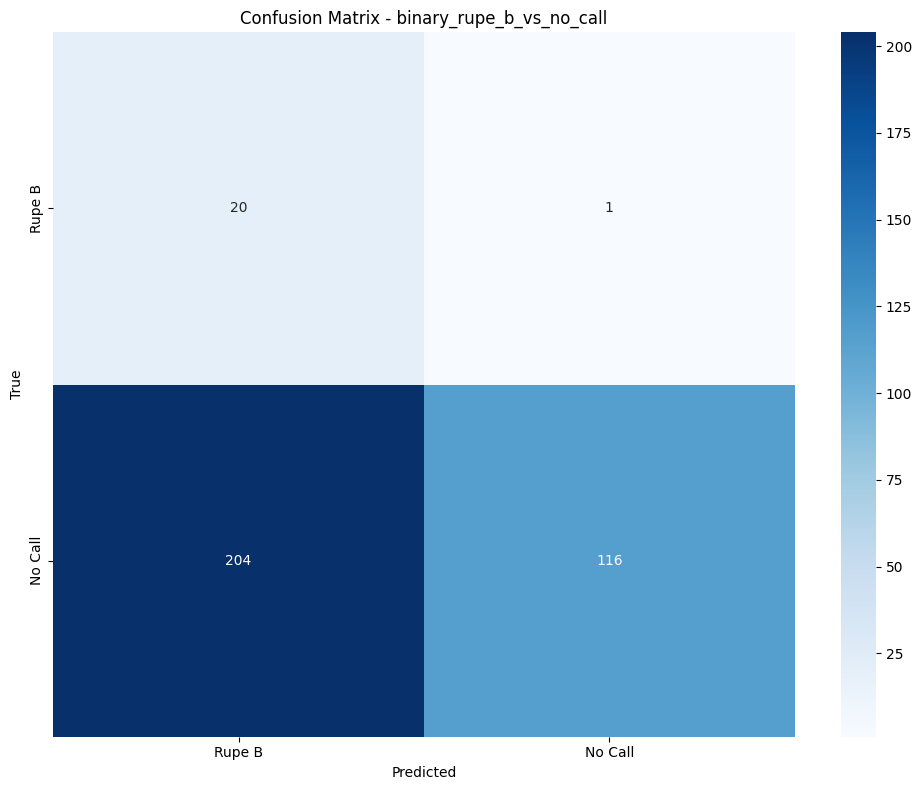

In [41]:
### Evaluate the Binary Model

def evaluate_model(model, X_test, y_test, class_names, model_name):
    """Evaluate a model and visualize results with improved class name handling"""
    # Get predictions
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
    
    # Get unique classes in the predictions and ground truth
    unique_classes = np.unique(np.concatenate([y_true, y_pred]))
    
    # Debug information
    print(f"Unique classes in true labels: {np.unique(y_true)}")
    print(f"Unique classes in predictions: {np.unique(y_pred)}")
    print(f"Number of classes in predictions and ground truth: {len(unique_classes)}")
    print(f"Number of class names provided: {len(class_names)}")
    
    # Ensure class_names matches the actual classes present in the data
    # This is crucial for classification_report to work correctly
    if len(unique_classes) != len(class_names):
        print(f"WARNING: Mismatch between number of classes ({len(unique_classes)}) " +
              f"and number of class names ({len(class_names)})")
        
        # Option 1: Use only class names for classes that actually appear in the data
        filtered_class_names = [class_names[i] for i in unique_classes if i < len(class_names)]
        
        # If we're still missing names for some classes, add generic names
        if len(filtered_class_names) < len(unique_classes):
            for i in unique_classes:
                if i >= len(class_names):
                    filtered_class_names.append(f"Class {i}")
        
        # Option 2: Only include class names for classes that appear in the data
        # filtered_class_names = [class_names[i] for i in range(len(class_names)) if i in unique_classes]
        
        print(f"Using filtered class names: {filtered_class_names}")
        class_names = filtered_class_names
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    
    # Generate confusion matrix only for classes that appear in the data
    conf_matrix = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
    
    # Generate classification report
    try:
        class_report = classification_report(y_true, y_pred, 
                                            target_names=class_names,
                                            labels=range(len(class_names)),
                                            output_dict=True)
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, 
                                  target_names=class_names,
                                  labels=range(len(class_names))))
    except Exception as e:
        print(f"Error generating classification report: {e}")
        print("Falling back to basic metrics")
        class_report = {"accuracy": accuracy}
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    try:
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.tight_layout()
        plt.savefig(f'models/{model_name}_confusion_matrix.png')
        plt.show()
    except Exception as e:
        print(f"Error plotting confusion matrix: {e}")
    
    # Save metrics
    metrics = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix.tolist(),
        'classification_report': class_report,
        'class_names': class_names
    }
    
    with open(f'models/{model_name}_metrics.pkl', 'wb') as f:
        pickle.dump(metrics, f)
    
    return metrics

# Evaluate the binary model 
if 'binary_model' in locals():
    binary_class_names = ['Rupe B', 'No Call']
    binary_metrics = evaluate_model(
        binary_model,
        X_test_binary,
        y_test_binary_onehot,
        binary_class_names,
        'binary_rupe_b_vs_no_call'
    )

### Multi-class Classification: All Seal Call Types

Now let's train models to classify all types of seal calls in the dataset.

/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.4134 - loss: 5.0819

69/69 ━━━━━━━━━━━━━━━━━━━━ 64s 862ms/step - accuracy: 0.4143 - loss: 5.0507 - val_accuracy: 0.4858 - val_loss: 4.2647 - learning_rate: 0.0010
Epoch 2/5
 1/69 ━━━━━━━━━━━━━━━━━━━━ 53s 793ms/step - accuracy: 0.6250 - loss: 1.3608

/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6250 - loss: 1.3608 - val_accuracy: 0.4858 - val_loss: 4.4909 - learning_rate: 0.0010
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 853ms/step - accuracy: 0.5782 - loss: 1.3281

69/69 ━━━━━━━━━━━━━━━━━━━━ 61s 880ms/step - accuracy: 0.5785 - loss: 1.3267 - val_accuracy: 0.5363 - val_loss: 3.5029 - learning_rate: 0.0010
Epoch 4/5
 1/69 ━━━━━━━━━━━━━━━━━━━━ 53s 786ms/step - accuracy: 0.6562 - loss: 0.9851

69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6562 - loss: 0.9851 - val_accuracy: 0.5394 - val_loss: 3.5251 - learning_rate: 0.0010
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 59s 860ms/step - accuracy: 0.6403 - loss: 1.0809 - val_accuracy: 0.5237 - val_loss: 2.3685 - learning_rate: 0.0010
Training completed in 189.37 seconds
Best validation accuracy: 0.5394


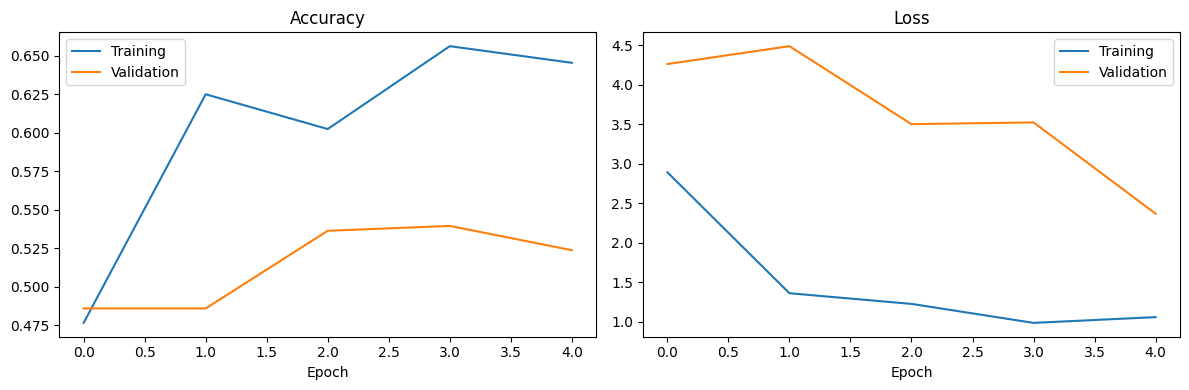

In [42]:
# Create and train the custom CNN for all classes
input_shape = X_train.shape[1:]
custom_model = create_custom_cnn(input_shape, num_classes)
custom_model, custom_history = train_model(
    custom_model,
    'custom_cnn_all_classes',
    X_train,
    y_train_onehot,
    X_val,
    y_val_onehot,
    batch_size=32,
    epochs=5
)



20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step
Unique classes in true labels: [ 0  1  2  3  4  5  6  7  8 11 13]
Unique classes in predictions: [0 3 4 5 6]
Number of classes in predictions and ground truth: 11
Number of class names provided: 14
Using filtered class names: [np.str_('G rupe'), np.str_('Growl B'), np.str_('HS Groan'), np.str_('Moan'), np.str_('No Call'), np.str_('Rupe A'), np.str_('Rupe B'), np.str_('Rupe C'), np.str_('Type 4 A'), np.str_('rupe A'), np.str_('unidentified')]

Classification Report:
              precision    recall  f1-score   support

      G rupe       1.00      0.05      0.10       135
     Growl B       0.00      0.00      0.00         1
    HS Groan       0.00      0.00      0.00         1
        Moan       1.00      0.01      0.02       103
     No Call       0.55      0.98      0.70       320
      Rupe A       0.00      0.00      0.00        41
      Rupe B       0.21      0.52      0.30        21
      Rupe C       0.00      0.00      0.00         5
  

/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.


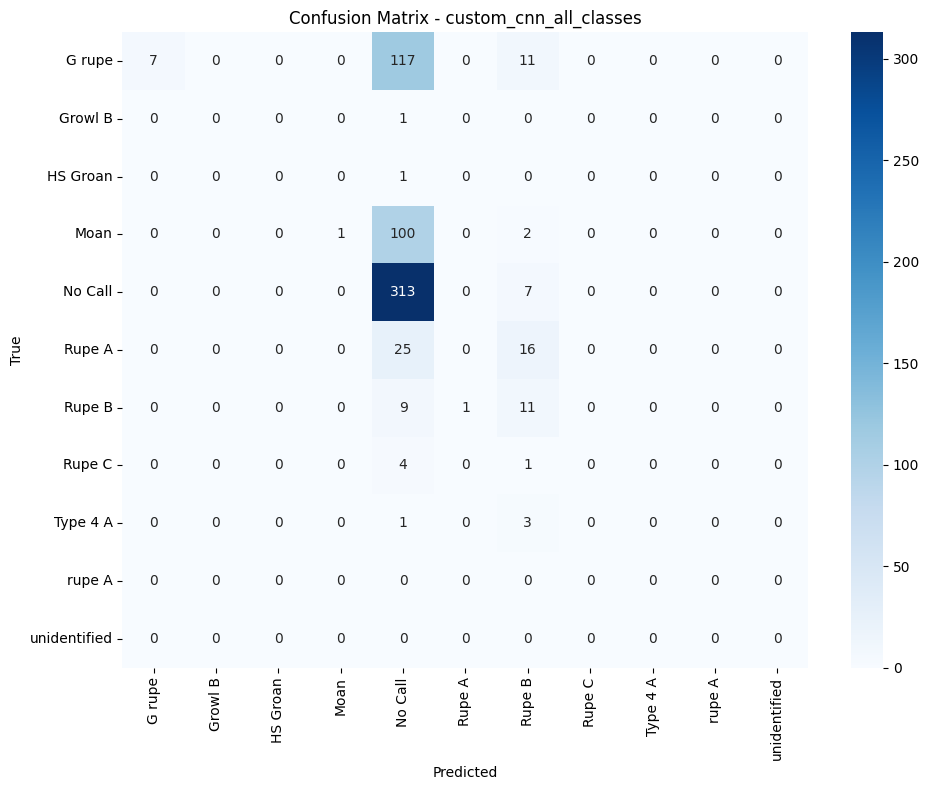

In [43]:
# Evaluate the custom CNN
class_names = list(id_to_label.values())
custom_metrics = evaluate_model(
    custom_model,
    X_test,
    y_test_onehot,
    class_names,
    'custom_cnn_all_classes'
)


### Transfer Learning Models

Transfer learning often works well for image classification tasks, including spectrograms.

Converted grayscale to RGB: (2215, 128, 128, 3)
Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.4843 - loss: 1.8109

69/69 ━━━━━━━━━━━━━━━━━━━━ 32s 393ms/step - accuracy: 0.4854 - loss: 1.8046 - val_accuracy: 0.7161 - val_loss: 0.7669 - learning_rate: 0.0010
Epoch 2/5
 1/69 ━━━━━━━━━━━━━━━━━━━━ 18s 269ms/step - accuracy: 0.6250 - loss: 1.2761

69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6250 - loss: 1.2761 - val_accuracy: 0.7224 - val_loss: 0.7702 - learning_rate: 0.0010
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6688 - loss: 0.9299

69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 357ms/step - accuracy: 0.6689 - loss: 0.9298 - val_accuracy: 0.7697 - val_loss: 0.6683 - learning_rate: 0.0010
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8125 - loss: 0.6512 - val_accuracy: 0.7666 - val_loss: 0.6776 - learning_rate: 0.0010
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - accuracy: 0.6977 - loss: 0.8391 - val_accuracy: 0.7413 - val_loss: 0.7189 - learning_rate: 0.0010
Training completed in 87.07 seconds
Best validation accuracy: 0.7697


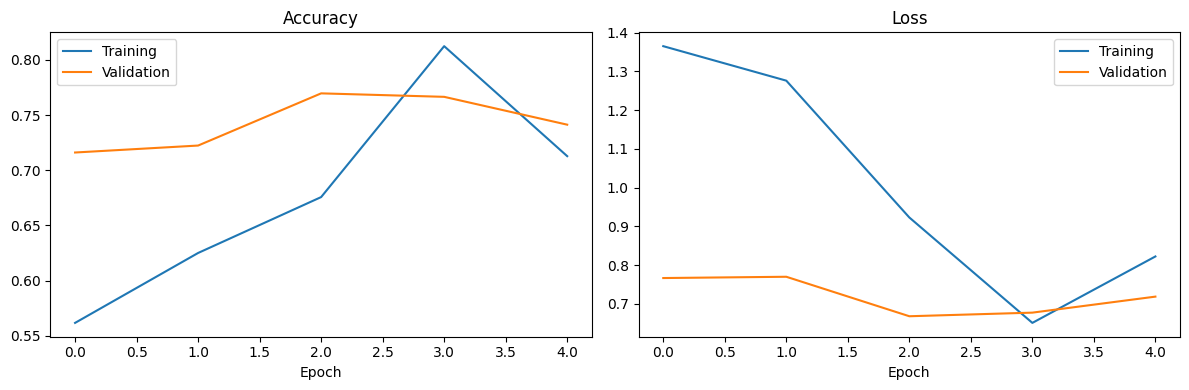

In [45]:
# For transfer learning, we need 3 channel input
# Let's replicate our single channel across 3 channels if needed
if X_train.shape[-1] == 1:
    X_train_rgb = np.repeat(X_train, 3, axis=-1)
    X_val_rgb = np.repeat(X_val, 3, axis=-1)
    X_test_rgb = np.repeat(X_test, 3, axis=-1)
    print(f"Converted grayscale to RGB: {X_train_rgb.shape}")
else:
    X_train_rgb = X_train
    X_val_rgb = X_val
    X_test_rgb = X_test

# Train MobileNetV2 transfer learning model
mobilenet_model = create_transfer_model('mobilenetv2', X_train_rgb.shape[1:], num_classes)
mobilenet_model, mobilenet_history = train_model(
    mobilenet_model,
    'mobilenetv2_transfer',
    X_train_rgb,
    y_train_onehot,
    X_val_rgb,
    y_val_onehot,
    batch_size=32,
    epochs=5
)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step
Unique classes in true labels: [ 0  1  2  3  4  5  6  7  8 11 13]
Unique classes in predictions: [0 3 4 5 6]
Number of classes in predictions and ground truth: 11
Number of class names provided: 14
Using filtered class names: [np.str_('G rupe'), np.str_('Growl B'), np.str_('HS Groan'), np.str_('Moan'), np.str_('No Call'), np.str_('Rupe A'), np.str_('Rupe B'), np.str_('Rupe C'), np.str_('Type 4 A'), np.str_('rupe A'), np.str_('unidentified')]

Classification Report:
              precision    recall  f1-score   support

      G rupe       0.72      0.75      0.73       135
     Growl B       0.00      0.00      0.00         1
    HS Groan       0.00      0.00      0.00         1
        Moan       0.91      0.38      0.53       103
     No Call       0.75      0.95      0.84       320
      Rupe A       0.62      0.59      0.60        41
      Rupe B       0.67      0.19      0.30        21
      Rupe C       0.00      0.00      0.00         5
  

/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/morio/.local/share/virtualenvs/seals-0Tmgw3lP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.


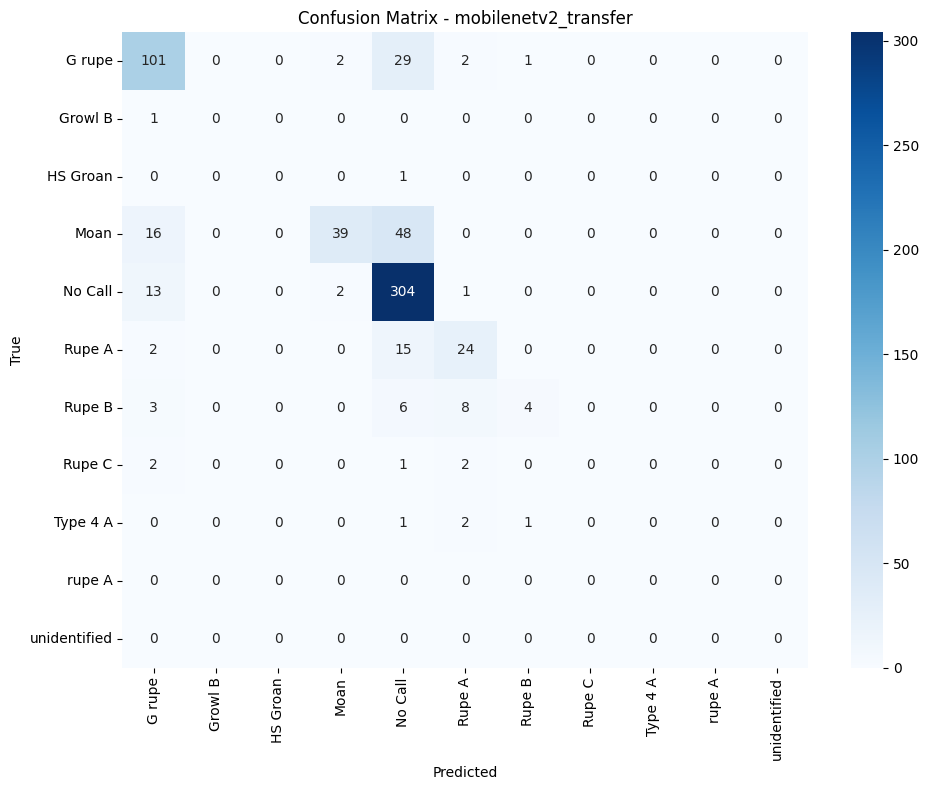

In [47]:

# Evaluate MobileNetV2 model
mobilenet_metrics = evaluate_model(
    mobilenet_model,
    X_test_rgb,
    y_test_onehot,
    class_names,
    'mobilenetv2_transfer'
)

### Compare Model Performance

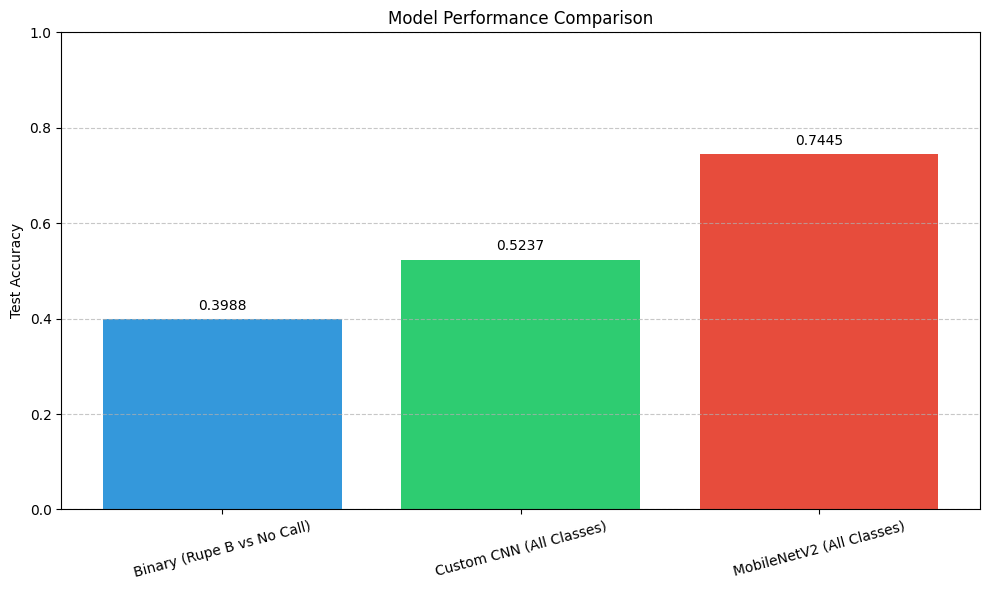

In [48]:

# Plot comparison of model accuracies
models = []
accuracies = []

if 'binary_metrics' in locals():
    models.append('Binary (Rupe B vs No Call)')
    accuracies.append(binary_metrics['accuracy'])

if 'custom_metrics' in locals():
    models.append('Custom CNN (All Classes)')
    accuracies.append(custom_metrics['accuracy'])

if 'mobilenet_metrics' in locals():
    models.append('MobileNetV2 (All Classes)')
    accuracies.append(mobilenet_metrics['accuracy'])

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['#3498db', '#2ecc71', '#e74c3c'])
plt.ylabel('Test Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.0)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.savefig('models/model_comparison.png')
plt.show()

Misclassification Analysis for Custom CNN:
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step


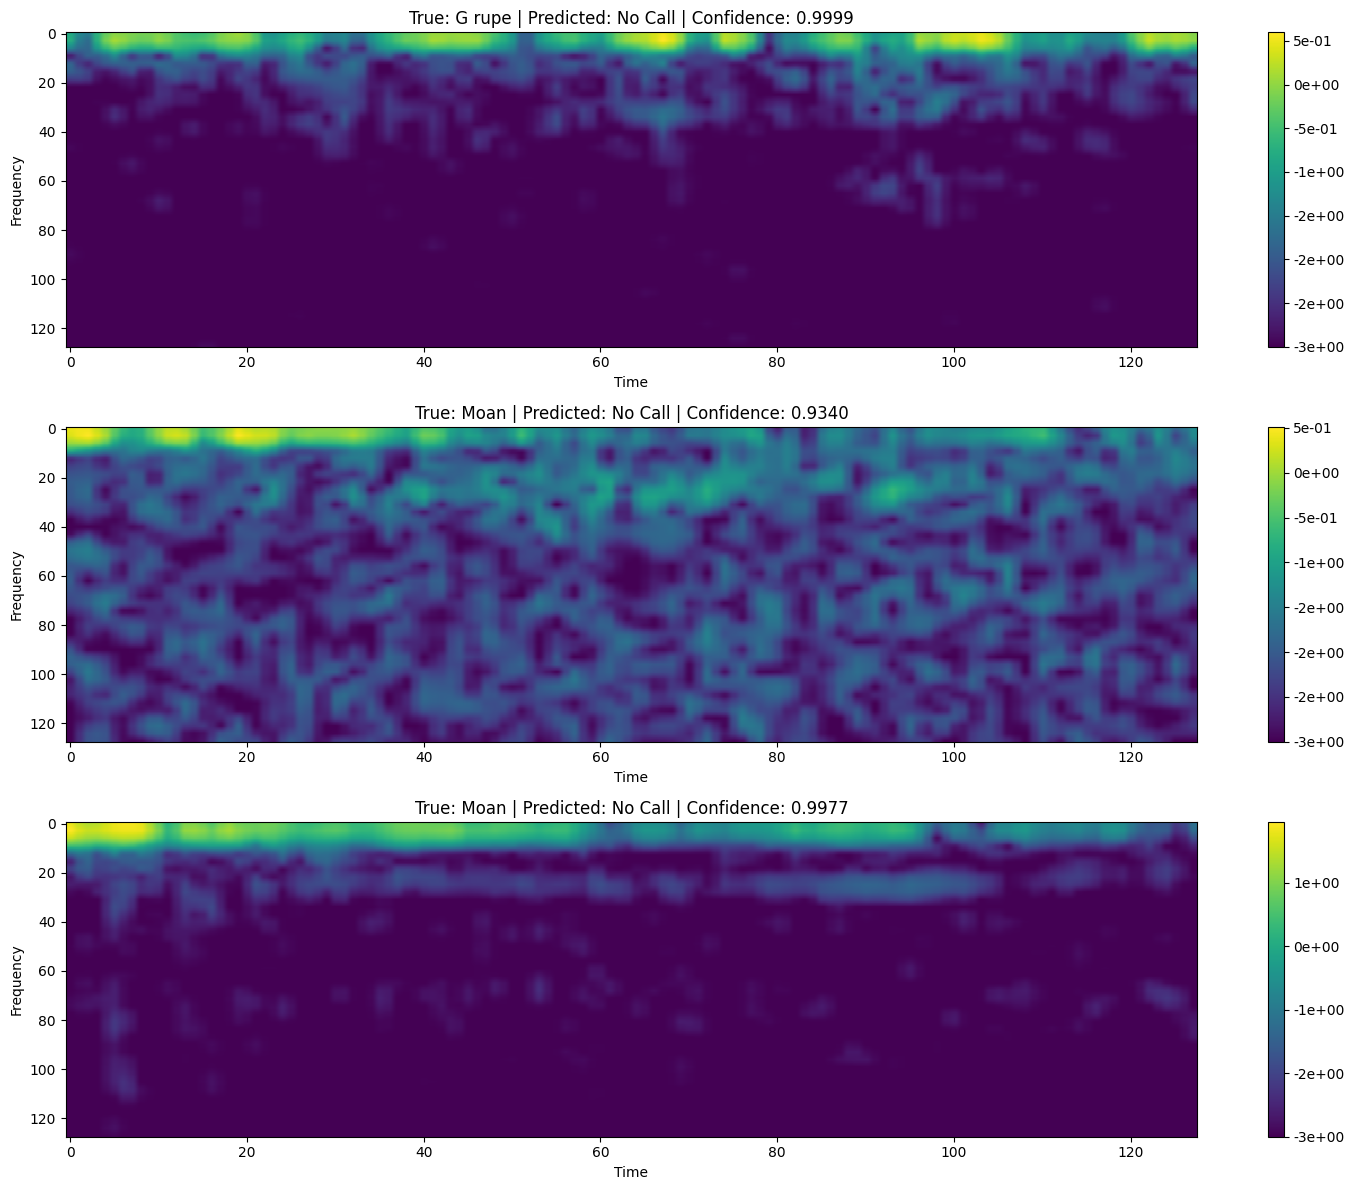

In [49]:
### Misclassification Analysis

def analyze_misclassifications(model, X_test, y_test, class_names, n_examples=3):
    """Analyze and visualize examples of misclassified spectrograms"""
    # Get predictions
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
    
    # Find misclassified examples
    misclassified = np.where(y_pred != y_true)[0]
    
    if len(misclassified) == 0:
        print("No misclassifications found!")
        return
    
    # Select some examples to display
    n_display = min(n_examples, len(misclassified))
    indices = np.random.choice(misclassified, n_display, replace=False)
    
    # Plot the misclassified examples
    plt.figure(figsize=(15, 4 * n_display))
    for i, idx in enumerate(indices):
        plt.subplot(n_display, 1, i + 1)
        
        # Get the spectrogram (remove channel dimension for display)
        spectrogram = X_test[idx]
        if len(spectrogram.shape) > 2:
            spectrogram = spectrogram[:, :, 0]  # Take first channel if RGB
        
        plt.imshow(spectrogram, aspect='auto', cmap='viridis')
        plt.colorbar(format='%.0e')
        
        true_class = class_names[y_true[idx]]
        pred_class = class_names[y_pred[idx]]
        confidence = y_pred_prob[idx, y_pred[idx]]
        
        plt.title(f'True: {true_class} | Predicted: {pred_class} | Confidence: {confidence:.4f}')
        plt.ylabel('Frequency')
        plt.xlabel('Time')
    
    plt.tight_layout()
    plt.savefig('models/misclassification_examples.png')
    plt.show()

# Analyze misclassifications from the custom CNN model
if 'custom_model' in locals():
    print("Misclassification Analysis for Custom CNN:")
    analyze_misclassifications(custom_model, X_test, y_test_onehot, class_names)

Feature Importance Analysis:
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━

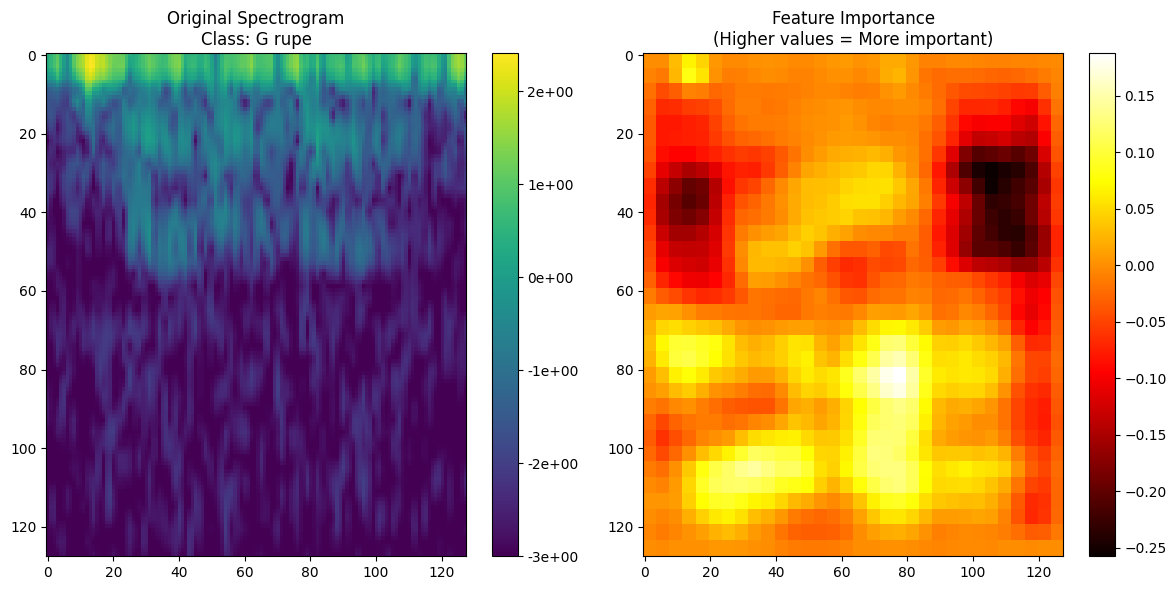

In [50]:
### Feature Importance Analysis

def analyze_feature_importance(model, X_test, class_names, n_examples=1):
    """
    Analyze which parts of the spectrogram are important for classification
    using occlusion sensitivity
    """
    # Select a correctly classified example for each class
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
    
    # Find correctly classified examples
    correct = np.where(y_pred == y_true)[0]
    
    if len(correct) == 0:
        print("No correctly classified examples found!")
        return
    
    # For each class, find examples and analyze feature importance
    for class_id in range(len(class_names)):
        # Find examples of this class
        class_indices = np.where(y_true[correct] == class_id)[0]
        if len(class_indices) == 0:
            continue
            
        # Take one example
        example_idx = correct[class_indices[0]]
        example = X_test[example_idx:example_idx+1]
        
        # Perform occlusion sensitivity analysis
        patch_size = (8, 8)  # Size of occlusion patch
        stride = 4  # Stride for moving the patch
        
        # Get original prediction probability
        orig_pred = model.predict(example)[0]
        orig_class = np.argmax(orig_pred)
        orig_prob = orig_pred[orig_class]
        
        # Create heatmap of the same size as input
        importance_map = np.zeros(example.shape[1:3])
        
        # Apply occlusion patches
        for i in range(0, example.shape[1] - patch_size[0] + 1, stride):
            for j in range(0, example.shape[2] - patch_size[1] + 1, stride):
                # Create occluded version
                occluded = example.copy()
                occluded[0, i:i+patch_size[0], j:j+patch_size[1], :] = 0
                
                # Get new prediction
                new_pred = model.predict(occluded)[0]
                new_prob = new_pred[orig_class]
                
                # Compute importance as drop in probability
                importance = orig_prob - new_prob
                
                # Update importance map
                importance_map[i:i+patch_size[0], j:j+patch_size[1]] += importance
        
        # Plot the results
        plt.figure(figsize=(12, 6))
        
        # Original spectrogram
        plt.subplot(1, 2, 1)
        spec_display = example[0, :, :, 0] if example.shape[-1] > 1 else example[0, :, :, 0]
        plt.imshow(spec_display, aspect='auto', cmap='viridis')
        plt.title(f'Original Spectrogram\nClass: {class_names[class_id]}')
        plt.colorbar(format='%.0e')
        
        # Importance map
        plt.subplot(1, 2, 2)
        plt.imshow(importance_map, aspect='auto', cmap='hot')
        plt.title('Feature Importance\n(Higher values = More important)')
        plt.colorbar()
        
        plt.tight_layout()
        plt.savefig(f'models/feature_importance_{class_names[class_id]}.png')
        plt.show()
        
        # Only do n_examples per class
        if n_examples <= 1:
            break

# Run feature importance analysis on one example per class
if 'custom_model' in locals() and len(class_names) > 0:
    print("Feature Importance Analysis:")
    analyze_feature_importance(custom_model, X_test, class_names)


In [52]:
### Save the Final Models

# Save models in TensorFlow SavedModel format for future use
if 'binary_model' in locals():
    binary_model.save('models/binary_model_saved.h5')
    print("Binary model saved")

if 'custom_model' in locals():
    custom_model.save('models/custom_model_saved.h5')
    print("Custom model saved")

if 'mobilenet_model' in locals():
    mobilenet_model.save('models/mobilenet_model_saved.h5')
    print("MobileNet model saved")


Binary model saved
Custom model saved
MobileNet model saved


### Fine Tune

In [53]:
# Load the dataset
with open('processed_data/seal_calls_dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

# Extract components
X_train = dataset['X_train']
y_train = dataset['y_train']
X_val = dataset['X_val']
y_val = dataset['y_val']
X_test = dataset['X_test']
y_test = dataset['y_test']
id_to_label = dataset['id_to_label']
label_to_id = dataset['label_to_id']
target_shape = dataset['target_shape']

# Print dataset information
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")
print(f"Number of classes: {len(id_to_label)}")
print(f"Classes: {list(label_to_id.keys())}")

# Reshape data for CNN input if needed
if len(X_train.shape) == 3:
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

# Convert labels to one-hot encoding
num_classes = len(id_to_label)
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_onehot = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)

Training set: (2215, 128, 128)
Validation set: (317, 128, 128)
Test set: (634, 128, 128)
Number of classes: 14
Classes: [np.str_('G rupe'), np.str_('Growl B'), np.str_('HS Groan'), np.str_('Moan'), np.str_('No Call'), np.str_('Rupe A'), np.str_('Rupe B'), np.str_('Rupe C'), np.str_('Type 4 A'), np.str_('Type 4 B'), np.str_('nan'), np.str_('rupe A'), np.str_('rupe B'), np.str_('unidentified')]
